In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('data/human_brain_motion.csv')
x = df['Time [s]'].values
y = df['Relative Position [mm]'].values

In [106]:
import numpy as np
import matplotlib.pyplot as plt

def reconstruct_time_series(time_series, sampling_rate):
    """
    Reconstructs a time series using the three highest peaks from its Fourier transform.

    Args:
        time_series (numpy array): Input time series data.
        sampling_rate (float): Sampling rate of the time series.

    Returns:
        reconstructed_series (numpy array): Reconstructed time series.
    """
    # Perform Fourier transform
    n = len(time_series)
    freqs = np.fft.fftfreq(n, d=1/sampling_rate)
    fft_values = np.fft.fft(time_series)

    # Get the indices of the 3 highest peaks in the Fourier transform magnitude
    magnitude = np.abs(fft_values)
    peak_indices = np.argsort(magnitude)[-20:]

    # Reconstruct the Fourier transform keeping only the 3 highest peaks
    fft_reconstructed = np.zeros_like(fft_values, dtype=complex)
    fft_reconstructed[peak_indices] = fft_values[peak_indices]
    fft_reconstructed[-peak_indices] = fft_values[-peak_indices]  # Mirror for negative frequencies

    # Perform the inverse Fourier transform
    reconstructed_series = np.fft.ifft(fft_reconstructed).real

    return reconstructed_series, freqs, magnitude

def fit_arima_and_reconstruct(time_series, order=(1, 1, 0)):
    """
    Fits an ARIMA model to the time series and reconstructs the time series.

    Args:
        time_series (numpy array or list): Input time series data.
        order (tuple): The (p, d, q) order of the ARIMA model.

    Returns:
        numpy array: The reconstructed time series from the ARIMA model.
    """
    # Fit ARIMA model
    model = ARIMA(time_series, order=order)
    model_fit = model.fit()
    # Reconstruct the time series using in-sample predictions
    reconstructed_series = model_fit.fittedvalues

    return reconstructed_series, model_fit.params

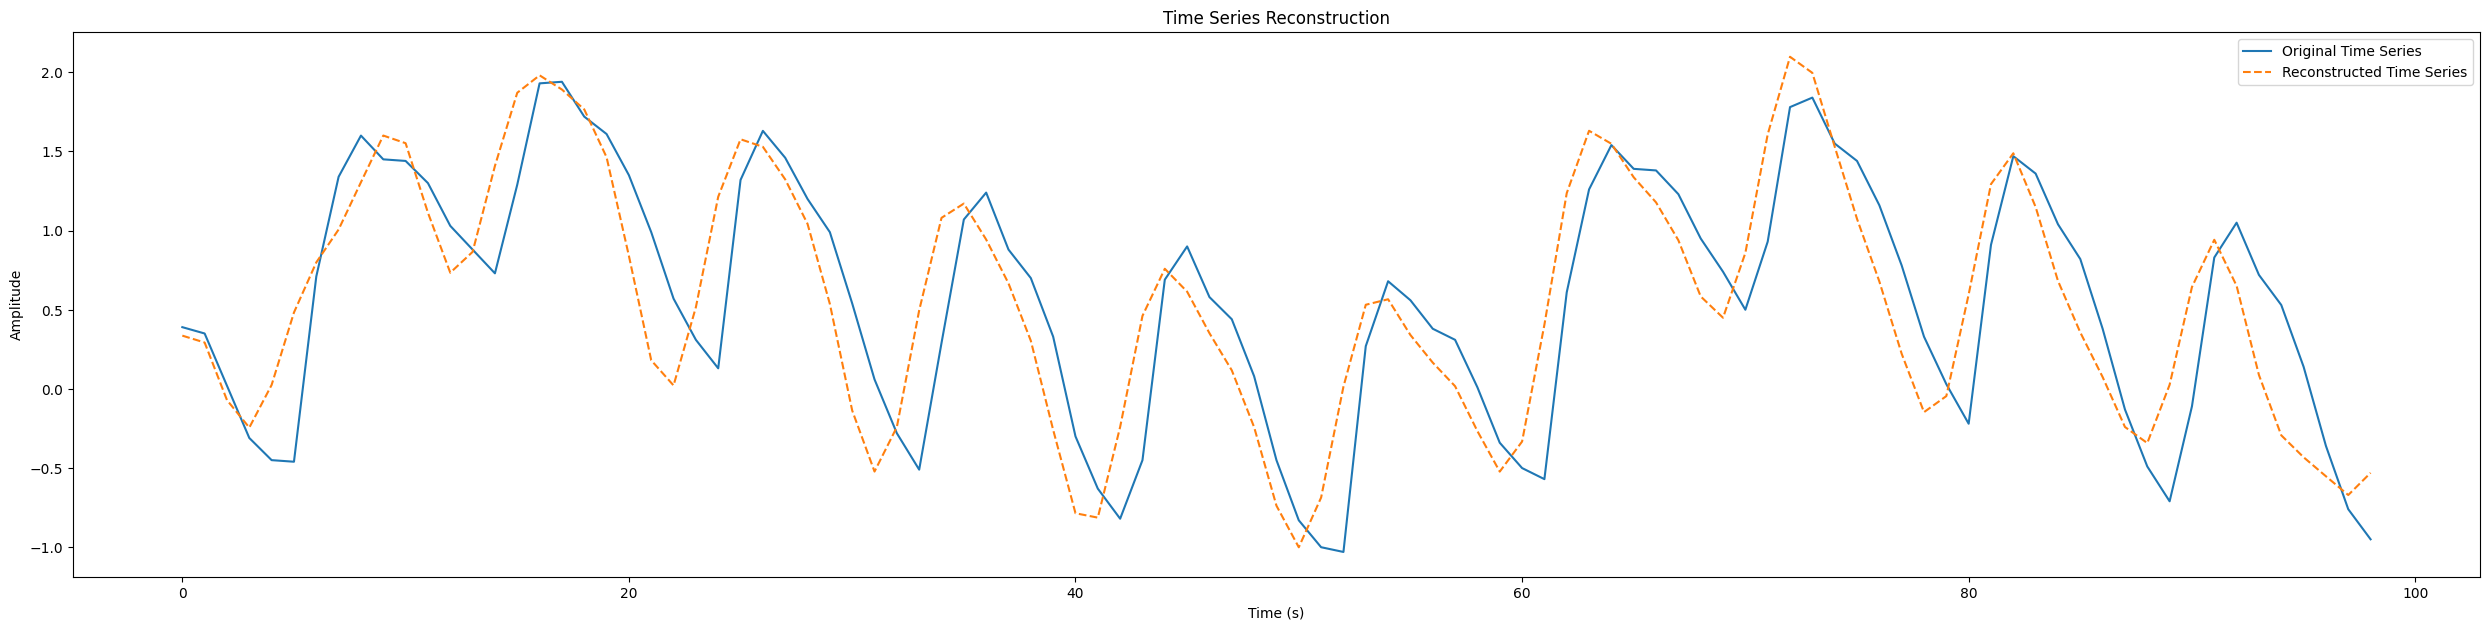

In [107]:
# Create a sample time series (sine waves with noise)
reconstructed_series, freqs, magnitude = reconstruct_time_series(y, 1/np.diff(x).mean())
#reconstructed_series, param = fit_arima_and_reconstruct(y, order=(2,0,0))

# Plot the original and reconstructed time series
plt.figure(figsize=(25, 12))
plt.subplot(2, 1, 1)
t = np.arange(0, len(y)-1, 1)
plt.plot(t, y[:len(y)-1], label="Original Time Series")
plt.plot(t, reconstructed_series[1:], label="Reconstructed Time Series", linestyle="--")
plt.legend()
plt.title("Time Series Reconstruction")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# # Plot the Fourier transform
# plt.subplot(2, 1, 2)
# plt.stem(freqs[:len(freqs)//2], magnitude[:len(freqs)//2], basefmt=" ")
# plt.title("Fourier Transform Magnitude (Original)")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

In [138]:
df = pd.read_csv('data/local_cycles/50.csv')
x = df['timestamp_ns'].values
y = df['height_inv_mm'].values

/opt/miniconda3/envs/playground/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/envs/playground/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/envs/playground/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/envs/playground/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  2., 10., 13.,  7., 10.,  6.]),
 array([0.98645855, 1.03334795, 1.08023735, 1.12712676, 1.17401616,
        1.22090556, 1.26779496, 1.31468436, 1.36157376, 1.40846316,
        1.45535256, 1.50224196, 1.54913136, 1.59602076, 1.64291016,
        1.68979956, 1.73668896, 1.78357836, 1.83046776, 1.87735716,
        1.92424656]),
 <BarContainer object of 20 artists>)

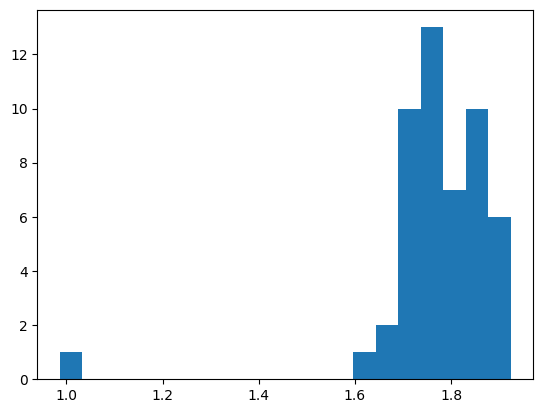

In [78]:
arr = []
for i in range(50):
    df = pd.read_csv(f'data/local_cycles/{i}.csv')
    x = df['timestamp_ns'].values
    y = df['height_inv_mm'].values
    reconstructed_series, freqs, magnitude = reconstruct_time_series(y, 1/np.diff(x).mean())
    reconstructed_series, param = fit_arima_and_reconstruct(y, order=(2,0,0))
    arr.append(param[1])

plt.hist(arr, bins=20)

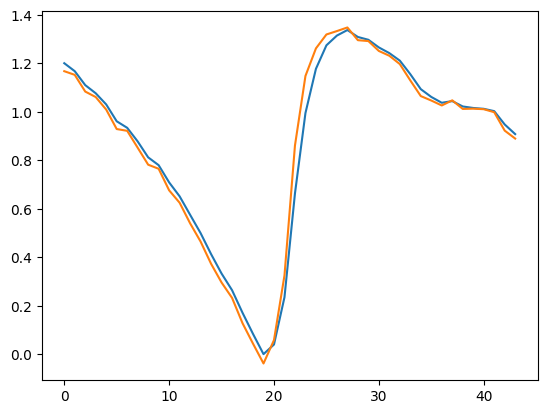

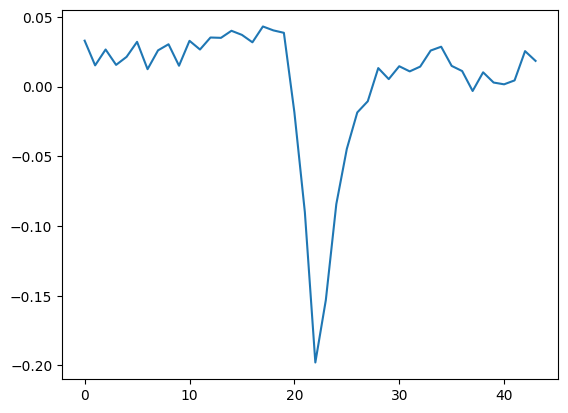

In [84]:
plt.plot(y[:-1])
new_time_series = [y[0], y[1]]
for i in range(2, len(y)):
    new_time_series.append(y[i-1] + 0.4616*(y[i-1] - y[i-2]))
plt.plot(new_time_series[1:])
plt.show()
plt.plot(y[:-1] - np.array(new_time_series)[1:])

In [50]:
a = [1,2]
for i in range(100):
    a.append(0.6*a[-1] + 0.3*a[-2]+ 1)
x = []
y = []
for i in range(len(a)-2):
    x.append([a[i], a[i+1], 1])
    y.append(a[i+2])

x = np.array(x)
y = np.array(y)

print( np.linalg.inv(x.T @ x) @ (x.T @ y))

[0.3 0.6 1. ]


In [86]:
np.diff(x/1_000_000).mean(), np.diff(x/1_000_000).std()

(20.871893783783786, 1.382300346152666)

In [100]:
np.max(np.abs(np.diff(y)))

0.222382

In [99]:
np.max(np.abs(y - reconstructed_series))

0.22092647271797614

Epoch 0/100000, Loss: 1.080489
Epoch 10000/100000, Loss: 0.646900
Epoch 20000/100000, Loss: 0.646900
Epoch 30000/100000, Loss: 0.646900
Epoch 40000/100000, Loss: 0.646900
Epoch 50000/100000, Loss: 0.646900
Epoch 60000/100000, Loss: 0.646900
Epoch 70000/100000, Loss: 0.646900
Epoch 80000/100000, Loss: 0.646900
Epoch 90000/100000, Loss: 0.646900
Learned Parameters: [ 0.75192781  1.00969344 -0.30928497]
Final Loss: 0.634200


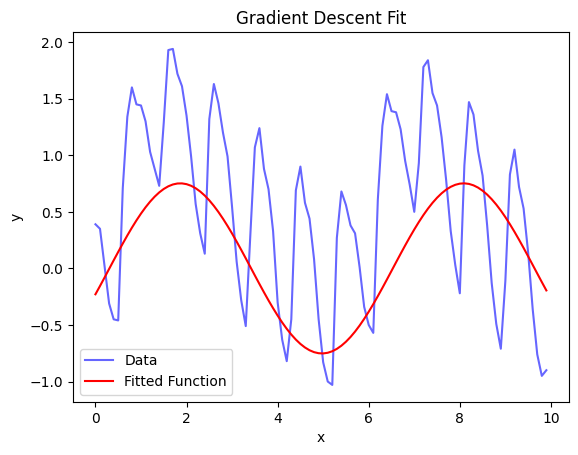

In [123]:
import numpy as np

# Function to evaluate the model
def evaluate_model(params, x):
    a, b, c = params
    return a * np.sin(b * x + c)

# Function to compute the loss (mean squared error)
def compute_loss(params, data):
    x, y = data
    predictions = evaluate_model(params, x)
    return np.mean((predictions - y) ** 2)

# Function to perform gradient descent
def gradient_descent(data, learning_rate, epochs, initial_params):
    x, y = data
    params = np.array(initial_params)

    for epoch in range(epochs):
        # Gradients for each parameter
        gradients = np.zeros_like(params)
        predictions = evaluate_model(params, x)
        errors = predictions - y

        gradients[0] = np.mean(2 * errors * np.sin(params[1] * x + params[2]))
        gradients[1] = np.mean(2 * errors * params[0] * x * np.cos(params[1] * x + params[2]))
        gradients[2] = np.mean(2 * errors * params[0] * np.cos(params[1] * x + params[2]))

        # Update parameters
        params -= learning_rate * gradients

        # Optionally, print the loss for debugging
        if epoch % (epochs // 10) == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {compute_loss(params, data):.6f}")

    return params


data = (x, y)

# Initial parameters
initial_params = [1, 1.0, 1.0]
learning_rate = 0.1
epochs = 100000

# Fit the model
learned_params = gradient_descent(data, learning_rate, epochs, initial_params)

# Print results
print("Learned Parameters:", learned_params)

# Compute final loss
final_loss = compute_loss(learned_params, data)
print(f"Final Loss: {final_loss:.6f}")

# Optional: Plot results
import matplotlib.pyplot as plt

plt.plot(x, y, label="Data", color="blue", alpha=0.6)
plt.plot(x, evaluate_model(learned_params, x), label="Fitted Function", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent Fit")
plt.show()


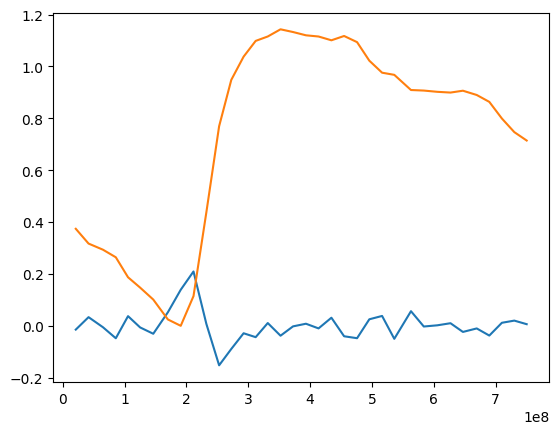

In [140]:
plt.plot(x[1:-1], np.diff(np.diff(y)))
plt.plot(x[1:-1], y[1:-1])

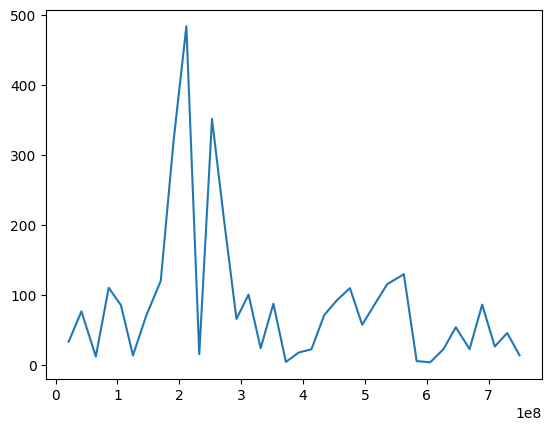

In [151]:
plt.plot(x[1:-1],np.abs(np.diff(np.diff(y))/0.0208**2))

In [144]:
np.diff(x).mean()/1e9

0.020871893783783783